<a href="https://colab.research.google.com/github/Shahid1993/colab-notebooks/blob/master/conditional_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing Enron Email Data

In [0]:
import pandas as pd

In [8]:
data = pd.read_csv("./sample_data/emails_10000.csv", engine='python', encoding='utf-8', error_bad_lines=False)
pd.set_option('display.max_colwidth',-1)
new = data["message"].str.split("\n", n = 15, expand = True) 

Skipping line 259: unexpected end of data


In [9]:
new.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>,"Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)",From: phillip.allen@enron.com,To: tim.belden@enron.com,Subject:,Mime-Version: 1.0,Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,X-From: Phillip K Allen,X-To: Tim Belden <Tim Belden/Enron@EnronXGate>,X-cc:,X-bcc:,"X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",X-Origin: Allen-P,X-FileName: pallen (Non-Privileged).pst,\nHere is our forecast\n\n
1,Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>,"Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)",From: phillip.allen@enron.com,To: john.lavorato@enron.com,Subject: Re:,Mime-Version: 1.0,Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,X-From: Phillip K Allen,X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,X-cc:,X-bcc:,"X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",X-Origin: Allen-P,X-FileName: pallen (Non-Privileged).pst,"\nTraveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n"


In [10]:
data.head(2)

,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n"
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nTraveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n"


In [0]:
data["from"] = new[2]
data["fromn"] = new[8]
data["to"] = new[3]
data["ton"] = new[9]
data["subject"] = new[4]
data["msg"] = new[15]
data.drop(columns =["message"], inplace = True) 
data.drop(columns =["file"], inplace = True) 

In [12]:
data.head(2)

,from,fromn,to,ton,subject,msg
0,From: phillip.allen@enron.com,X-From: Phillip K Allen,To: tim.belden@enron.com,X-To: Tim Belden <Tim Belden/Enron@EnronXGate>,Subject:,\nHere is our forecast\n\n
1,From: phillip.allen@enron.com,X-From: Phillip K Allen,To: john.lavorato@enron.com,X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,Subject: Re:,"\nTraveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n"


In [0]:
data['from'] = data["from"].apply(lambda val: val.replace("From:",''))
data['fromn'] = data["fromn"].apply(lambda val: val.replace("X-From:",''))
data['to'] = data["to"].apply(lambda val: val.replace("To:",''))
data['ton'] = data["ton"].apply(lambda val: val.replace("X-To:",''))
data['subject'] = data["subject"].apply(lambda val: val.replace("Subject:",''))
data['msg'] = data["msg"].apply(lambda val: val.replace("\n",' '))

In [14]:
data.head(2)

,from,fromn,to,ton,subject,msg
0,phillip.allen@enron.com,Phillip K Allen,tim.belden@enron.com,Tim Belden <Tim Belden/Enron@EnronXGate>,,Here is our forecast
1,phillip.allen@enron.com,Phillip K Allen,john.lavorato@enron.com,John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,Re:,"Traveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary. As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. My suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time."


In [15]:
# Lets look only at emails with 100 words or less and that are Non-replies
data[(data['msg'].str.len() <100) & ~(data['subject'].str.contains('Re:'))].sample(5)

,from,fromn,to,ton,subject,msg
119,phillip.allen@enron.com,Phillip K Allen,hunter.shively@enron.com,Hunter S Shively,,"Hunter, Are you watching Alberto? Do you have Yahoo Messenger or Hear Me turned on? Phillip"
218,phillip.allen@enron.com,Phillip K Allen,fletcher.sturm@enron.com,Fletcher J Sturm,,"socal position This is short, but is it good enough?"
49,phillip.allen@enron.com,Phillip K Allen,moshuffle@hotmail.com,moshuffle@hotmail.com,,http://www.hearme.com/vc2/?chnlOwnr=pallen@enron.com
62,phillip.allen@enron.com,Phillip K Allen,ina.rangel@enron.com,Ina Rangel,,"Ina, I scheduled a meeting with Jean Mrha tomorrow at 3:30"
143,phillip.allen@enron.com,Phillip K Allen,brendas@surffree.com,brendas@surffree.com,test,testing


In [17]:
data.head()['msg']

0     Here is our forecast                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1     Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without 

In [0]:
corpus = [msg for msg in data[(data['msg'].str.len() <200) & ~(data['subject'].str.contains('Re:'))]['msg']]

In [19]:
corpus[0:50]

[' Here is our forecast   ',
 ' Randy,   Can you send me a schedule of the salary and level of everyone in the  scheduling group.  Plus your thoughts on any changes that need to be made.   (Patti S for example)  Phillip',
 ' Dave,    Here are the names of the west desk members by category.  The origination  side is very sparse.        Phillip ',
 ' Tim,  mike grigsby is having problems with accessing the west power site.  Can you please make sure he has an active password.    Thank you,  Phillip',
 ' Brenda,  Please use the second check as the October payment.  If you have already  tossed it, let me know so I can mail you another.  Phillip',
 ' Chris,   What is the latest with PG&E?  We have been having good discussions  regarding EOL.  Call me when you can. X37041  Phillip',
 ' Greg,  Happy B-day. Email me your phone # and I will call you.  Keith',
 ' Jim,  Is there going to be a conference call or some type of weekly meeting about all the regulatory issues facing California this week

In [20]:
len(corpus)

39

In [21]:
# Start by importing all the things we'll need.
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, CuDNNLSTM, Flatten, TimeDistributed, Dropout, LSTMCell, RNN, Bidirectional, Concatenate, Layer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.utils import tf_utils
from tensorflow.keras import backend as K

import unicodedata
import re
import numpy as np
import os
import time
import shutil

import pandas as pd
import numpy as np
import string, os 
tf.__version__

'1.14.0'

In [0]:
def clean_special_chars(text, punct):
    for p in punct:
        text = text.replace(p, '')
    return text

      
def preprocess(data):
    output = []
    punct = '#$%&*+-/<=>@[\\]^_`{|}~\t\n'
    for line in data:
         pline= clean_special_chars(line.lower(), punct)
         output.append(pline)
    return output  


def generate_dataset():
  
    processed_corpus = preprocess(corpus)    
    output = []
    for line in processed_corpus:
        token_list = line
        for i in range(1, len(token_list)):
            data = []
            x_ngram = '<start> '+ token_list[:i+1] + ' <end>'
            y_ngram = '<start> '+ token_list[i+1:] + ' <end>'
            data.append(x_ngram)
            data.append(y_ngram)
            output.append(data)
    print("Dataset prepared with prefix and suffixes for teacher forcing technique")
    dummy_df = pd.DataFrame(output, columns=['input','output'])
    return output, dummy_df            

In [0]:
class LanguageIndex():
    def __init__(self, lang):
        self.lang = lang
        self.word2idx = {}
        self.idx2word = {}
        self.vocab = set()
        self.create_index()
    def create_index(self):
        for phrase in self.lang:
            self.vocab.update(phrase.split(' '))
        self.vocab = sorted(self.vocab)
        self.word2idx["<pad>"] = 0
        self.idx2word[0] = "<pad>"
        for i,word in enumerate(self.vocab):
            self.word2idx[word] = i + 1
            self.idx2word[i+1] = word

def max_length(t):
    return max(len(i) for i in t)

def load_dataset():
    pairs,df = generate_dataset()
    out_lang = LanguageIndex(sp for en, sp in pairs)
    in_lang = LanguageIndex(en for en, sp in pairs)
    input_data = [[in_lang.word2idx[s] for s in en.split(' ')] for en, sp in pairs]
    output_data = [[out_lang.word2idx[s] for s in sp.split(' ')] for en, sp in pairs]

    max_length_in, max_length_out = max_length(input_data), max_length(output_data)
    input_data = tf.keras.preprocessing.sequence.pad_sequences(input_data, maxlen=max_length_in, padding="post")
    output_data = tf.keras.preprocessing.sequence.pad_sequences(output_data, maxlen=max_length_out, padding="post")
    return input_data, output_data, in_lang, out_lang, max_length_in, max_length_out, df


In [24]:
input_data, teacher_data, input_lang, target_lang, len_input, len_target, df = load_dataset()


target_data = [[teacher_data[n][i+1] for i in range(len(teacher_data[n])-1)] for n in range(len(teacher_data))]
target_data = tf.keras.preprocessing.sequence.pad_sequences(target_data, maxlen=len_target, padding="post")
target_data = target_data.reshape((target_data.shape[0], target_data.shape[1], 1))

# Shuffle all of the data in unison. This training set has the longest (e.g. most complicated) data at the end,
# so a simple Keras validation split will be problematic if not shuffled.

p = np.random.permutation(len(input_data))
input_data = input_data[p]
teacher_data = teacher_data[p]
target_data = target_data[p]

Dataset prepared with prefix and suffixes for teacher forcing technique


In [25]:
pd.set_option('display.max_colwidth', -1)
BUFFER_SIZE = len(input_data)
BATCH_SIZE = 128
embedding_dim = 300
units = 128
vocab_in_size = len(input_lang.word2idx)
vocab_out_size = len(target_lang.word2idx)
df.iloc[60:65]

,input,output
60,"<start> randy, can you send me a schedule of <end>",<start> the salary and level of everyone in the scheduling group. plus your thoughts on any changes that need to be made. (patti s for example) phillip <end>
61,"<start> randy, can you send me a schedule of <end>",<start> the salary and level of everyone in the scheduling group. plus your thoughts on any changes that need to be made. (patti s for example) phillip <end>
62,"<start> randy, can you send me a schedule of t <end>",<start> he salary and level of everyone in the scheduling group. plus your thoughts on any changes that need to be made. (patti s for example) phillip <end>
63,"<start> randy, can you send me a schedule of th <end>",<start> e salary and level of everyone in the scheduling group. plus your thoughts on any changes that need to be made. (patti s for example) phillip <end>
64,"<start> randy, can you send me a schedule of the <end>",<start> salary and level of everyone in the scheduling group. plus your thoughts on any changes that need to be made. (patti s for example) phillip <end>


In [26]:
# Create the Encoder layers first.
encoder_inputs = Input(shape=(len_input,))
encoder_emb = Embedding(input_dim=vocab_in_size, output_dim=embedding_dim)

# Use this if you dont need Bidirectional LSTM
# encoder_lstm = CuDNNLSTM(units=units, return_sequences=True, return_state=True)
# encoder_out, state_h, state_c = encoder_lstm(encoder_emb(encoder_inputs))

encoder_lstm = Bidirectional(CuDNNLSTM(units=units, return_sequences=True, return_state=True))
encoder_out, fstate_h, fstate_c, bstate_h, bstate_c = encoder_lstm(encoder_emb(encoder_inputs))
state_h = Concatenate()([fstate_h,bstate_h])
state_c = Concatenate()([bstate_h,bstate_c])
encoder_states = [state_h, state_c]


# Now create the Decoder layers.
decoder_inputs = Input(shape=(None,))
decoder_emb = Embedding(input_dim=vocab_out_size, output_dim=embedding_dim)
decoder_lstm = CuDNNLSTM(units=units*2, return_sequences=True, return_state=True)
decoder_lstm_out, _, _ = decoder_lstm(decoder_emb(decoder_inputs), initial_state=encoder_states)
# Two dense layers added to this model to improve inference capabilities.
decoder_d1 = Dense(units, activation="relu")
decoder_d2 = Dense(vocab_out_size, activation="softmax")
decoder_out = decoder_d2(Dropout(rate=.2)(decoder_d1(Dropout(rate=.2)(decoder_lstm_out))))


# Finally, create a training model which combines the encoder and the decoder.
# Note that this model has three inputs:
model = Model(inputs = [encoder_inputs, decoder_inputs], outputs= decoder_out)

# We'll use sparse_categorical_crossentropy so we don't have to expand decoder_out into a massive one-hot array.
# Adam is used because it's, well, the best.

model.compile(optimizer=tf.train.AdamOptimizer(), loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])
model.summary()

W0903 11:42:12.627730 140377718028160 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0903 11:42:12.635505 140377718028160 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0903 11:42:12.641535 140377718028160 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 51)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 51, 300)      414900      input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, 51, 256), (N 440320      embedding[0][0]                  
______________________________________________________________________________________________

In [27]:
# Note, we use 20% of our data for validation.
epochs = 10
history = model.fit([input_data, teacher_data], target_data,
                 batch_size= BATCH_SIZE,
                 epochs=epochs,
                 validation_split=0.2)

W0903 11:42:54.017243 140377718028160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3133 samples, validate on 784 samples
Epoch 1/10
3133/3133 [==============================] - 5s 2ms/sample - loss: 3.8500 - sparse_categorical_accuracy: 0.6709 - val_loss: 1.8793 - val_sparse_categorical_accuracy: 0.7129
Epoch 2/10
3133/3133 [==============================] - 1s 343us/sample - loss: 1.8101 - sparse_categorical_accuracy: 0.7073 - val_loss: 1.6246 - val_sparse_categorical_accuracy: 0.7142
Epoch 3/10
3133/3133 [==============================] - 1s 345us/sample - loss: 1.5416 - sparse_categorical_accuracy: 0.7362 - val_loss: 1.4065 - val_sparse_categorical_accuracy: 0.7629
Epoch 4/10
3133/3133 [==============================] - 1s 343us/sample - loss: 1.3866 - sparse_categorical_accuracy: 0.7624 - val_loss: 1.3275 - val_sparse_categorical_accuracy: 0.7645
Epoch 5/10
3133/3133 [==============================] - 1s 344us/sample - loss: 1.3117 - sparse_categorical_accuracy: 0.7669 - val_loss: 1.2491 - val_sparse_categorical_accuracy: 0.7762
Epoch 6/10
3133/3133 [===

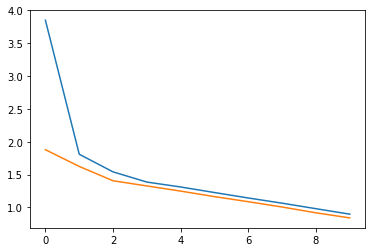

In [28]:
# Plot the results of the training.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.show()

In [0]:


# Create the encoder model from the tensors we previously declared.
encoder_model = Model(encoder_inputs, [encoder_out, state_h, state_c])

# Generate a new set of tensors for our new inference decoder. Note that we are using new tensors, 
# this does not preclude using the same underlying layers that we trained on. (e.g. weights/biases).

inf_decoder_inputs = Input(shape=(None,), name="inf_decoder_inputs")
# We'll need to force feed the two state variables into the decoder each step.
state_input_h = Input(shape=(units*2,), name="state_input_h")
state_input_c = Input(shape=(units*2,), name="state_input_c")
decoder_res, decoder_h, decoder_c = decoder_lstm(
    decoder_emb(inf_decoder_inputs), 
    initial_state=[state_input_h, state_input_c])
inf_decoder_out = decoder_d2(decoder_d1(decoder_res))
inf_model = Model(inputs=[inf_decoder_inputs, state_input_h, state_input_c], 
                  outputs=[inf_decoder_out, decoder_h, decoder_c])



In [0]:
# Converts the given sentence (just a string) into a vector of word IDs
# Output is 1-D: [timesteps/words]

def sentence_to_vector(sentence, lang):

    pre = sentence
    vec = np.zeros(len_input)
    sentence_list = [lang.word2idx[s] for s in pre.split(' ')]
    for i,w in enumerate(sentence_list):
        vec[i] = w
    return vec

# Given an input string, an encoder model (infenc_model) and a decoder model (infmodel),
def translate(input_sentence, infenc_model, infmodel):
    sv = sentence_to_vector(input_sentence, input_lang)
    sv = sv.reshape(1,len(sv))
    [emb_out, sh, sc] = infenc_model.predict(x=sv)
    
    i = 0
    start_vec = target_lang.word2idx["<start>"]
    stop_vec = target_lang.word2idx["<end>"]
    
    cur_vec = np.zeros((1,1))
    cur_vec[0,0] = start_vec
    cur_word = "<start>"
    output_sentence = ""

    while cur_word != "<end>" and i < (len_target-1):
        i += 1
        if cur_word != "<start>":
            output_sentence = output_sentence + " " + cur_word
        x_in = [cur_vec, sh, sc]
        [nvec, sh, sc] = infmodel.predict(x=x_in)
        cur_vec[0,0] = np.argmax(nvec[0,0])
        cur_word = target_lang.idx2word[np.argmax(nvec[0,0])]
    return output_sentence

In [50]:
#Note that only words that we've trained the model on will be available, otherwise you'll get an error.


# test = [
#     'hi there',
#     'hell',
#     'presentation please fin',
#     'resignation please find at',
#     'resignation please ',
#     'have a nice we',
#     'let me ',
#     'promotion congrats ',
#     'christmas Merry ',
#     'please rev',
#     'please ca',
#     'thanks fo',
#     'Let me kno',
#     'Let me know if y',
#     'this soun',
#     'is this call going t'
# ]

test = [
    'hi',
    'let me ',
    'please ca',
    'Let me kno',
    'Let me know if y',
    'is this call going t',
    'randy, can you send me a schedule of',
    'this'
]
  

import pandas as pd
output = []  
for t in test:  
  output.append({"Input seq":t.lower(), "Pred. Seq":translate(t.lower(), encoder_model, inf_model)})

results_df = pd.DataFrame.from_dict(output) 
results_df.head(len(test))

,Input seq,Pred. Seq
0,hi,phillip
1,let me,phillip
2,please ca,phillip
3,let me kno,phillip
4,let me know if y,phillip
5,is this call going t,phillip
6,"randy, can you send me a schedule of",phillip
7,this,phillip


In [42]:
# This is to save the model for the web app to use for generation
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = inf_model.to_json()


with open("./sample_data/model_num.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
inf_model.save_weights("./sample_data/model_num.h5")

Using TensorFlow backend.
